<a href="https://colab.research.google.com/github/vid-nath/ucb-w207-applied-ml/blob/master/Home_Price_Prediction-VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data overview 


In [2]:
## Vidhu Nath Version

# Basic data loading example
# This will mount your gdrive on colab environment
# Top level libraries
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Home Price Prediction Project
### Team member: 
Rahul Kulkarni, Vidhu Nath, Hyunchul (Peter) Kim, Shujing Dong

 ## Baseline 
 ### Overview
 #### 1. Introduction and problem statement
 
This [project](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) aims to predict home price of residential homes in Ames, Iowa. The dataset includes 79 independent variables (features) of every possible aspect of residential homes in Ames, Iowa. Using these features, we will want to create a regression model with which we will determine house prices given our input features.
 
From our preliminary analysis of the given dataset, we observed
38 numeric features (e.g. year build ) and 43 categorical features(e.g. fireplaces). Training and Test data show an equal split of sample sizes of 1460 and 1459 samples  respectively

Opens: 79 vs. 80/81, why the number of features are different?


__High-level (internal-use):__
* Expand on on EDA - look at some high-level, intuitive variables as to what could affect sales price of home.
* Explain how our data selection will affect which model type we will pick
* Explain why other machine learning analytical techniques will/will not help with our prediction 
* Try applying data and looking at initial results.



 
 #### 2. Assumptions: 
The assumptions we make about the sample data are that the samples are normally distributed and there is no multicolinearity between features.

If we are looking at Naive Bayes, then we will assume that features are independent of each other.

  
    
#### 3. Approaches: 
The initial set of approaches we intend to undertake are listed below, based on the outcome of our analysis we may decide to pick the one(s) which are most optimal for our solution

    - Multiple linear regression
    - Ploynominal regression
    - Kernal regression
    - CNN
    - Random Forest
    - Gradient boosting (listed in the challenge discription)
 
 #### 4. Issues may encounter:
 Based on our initial analysis we anticipate that some of the challenges we may encounter to be around feature selection and feature engineering and also non-linearity of features




-----------------------------------------------------
   Notes from first group meeting: 
   - 1st principles: 
    - four elements: 
    - Fit: Data, Model, cost function, objectives
    - Test: 

### Feature Engineering
weight, coeffiecient, 


### Error Analysis
-----------------------------------------------------

In [0]:
# Get data will load file from your gdrive. 

def get_data():
    # Reference: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33   
    #get train data
    train_data_path ='gdrive/My Drive/Colab Notebooks/w207_final_project/house-prices-advanced-regression-techniques/train.csv'
    train = pd.read_csv(train_data_path)
    
   
    #get test data
    test_data_path ='gdrive/My Drive/Colab Notebooks/w207_final_project/house-prices-advanced-regression-techniques/test.csv'
    test = pd.read_csv(test_data_path)
    return train , test

def get_combined_data():
    # Reference: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
    #reading train data
    train , test = get_data()

    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)

    combined = train.append(test)
  
    combined.reset_index(inplace=True)  
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()
  
#Load train and test data into pandas DataFrames
train, test = get_data()
# original data frame backup for reference
train_orig = train.copy()
test_orig = test.copy()

In [4]:
# Quick look at the train data set.
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# Feature overview

# Check how many numeric and categorical features exist
# SalePrice (Output) included
numeric_columns = [f for f in train.columns if train.dtypes[f] != 'object']
category_columns = [f for f in train.columns if train.dtypes[f] == 'object']
print('Numeric features: {}'.format(len(numeric_columns)))
print('Categorical features: {}'.format(len(category_columns)))
print("Train and Test datasets size:")
train.shape, test.shape

Numeric features: 38
Categorical features: 43
Train and Test datasets size:


((1460, 81), (1459, 80))

In [7]:
print('Numeric feature names : {}'.format(numeric_columns))
print('Categorical feature names : {}'.format(category_columns))


print('Categorical feature names : {}'.format(np.shape(category_columns)))

Numeric feature names : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical feature names : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'

In [0]:
# VN EDA
# Reference: https://www.kaggle.com/dgawlik/house-prices-eda
import matplotlib.pyplot as plt

Total of 2919 data sets: 1460 Train +  1459 Test set

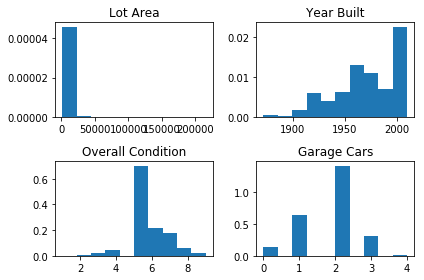

In [9]:

# For initial starters, pick some numerical variables, and investigate them.
# Pick LotArea, YearBuilt, GarageCars, OverallCond as starters

# Set the variables
lot_area_train = train['LotArea']
year_built_train = train['YearBuilt']
overall_cond_train = train['OverallCond']
garage_cars_train = train['GarageCars']

n_bins = 10

# Start with histograms of each
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(lot_area_train, n_bins, density=True, histtype='bar')
ax0.set_title('Lot Area')

ax1.hist(year_built_train, n_bins, density=True, histtype='bar')
ax1.set_title('Year Built')

ax2.hist(overall_cond_train, n_bins, density=True, histtype='bar')
ax2.set_title('Overall Condition')

ax3.hist(garage_cars_train, n_bins, density=True, histtype='bar')
ax3.set_title('Garage Cars')

fig.tight_layout()
plt.show()

In [0]:
# Find the missing data from each category, and see what's up with that.\

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Reconvert missing lists to have all features with missing data
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

# Sort from least to greatest
missing_train.sort_values(inplace=True)
missing_test.sort_values(inplace=True)


# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar()

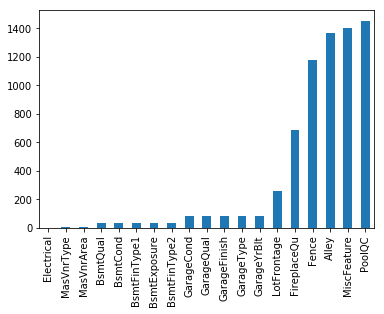

In [11]:
# Plot to see results
missing_train.plot.bar()

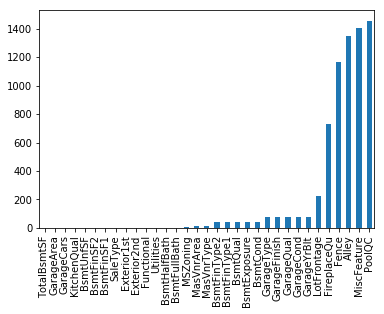

In [12]:
missing_test.plot.bar()

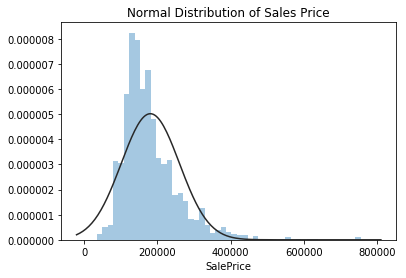

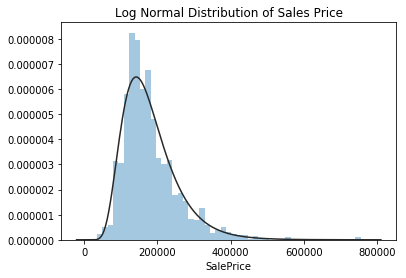

In [13]:
# Note that PoolQC has the most missing data - most likely due to the fact that most homes don't have a pool

# We should also examine how the main variable, sales price, is via plotting with seaborn
sales_price = train['SalePrice']

import seaborn as sns
import scipy.stats as stat

plt.figure(1); plt.title('Normal Distribution of Sales Price')
sns.distplot(sales_price, kde=False, fit=stat.norm)
plt.figure(2); plt.title('Log Normal Distribution of Sales Price')
sns.distplot(sales_price, kde=False, fit=stat.lognorm)

# Looks Like log of the nomral would be the best distribution to test with

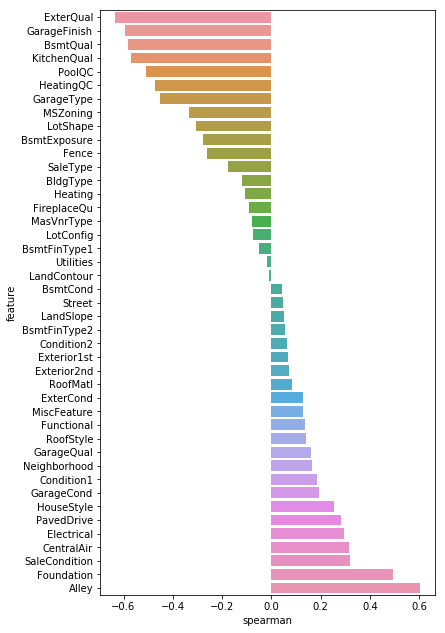

In [14]:
# Provide a nice way to look at the correlations between the data

def corr_diagrams(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = category_columns
corr_diagrams(train, features)


#  Exploratory data analysis (EDA) 
  - Univariate analysis
  - Bivariate analysis



# Feature Engineering
  - Normalize
  - Missing data processing
  - One hot encoding for categorical features
     https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
     
  - Transformation: log operator and etc
  - Feature selection

## One hot encoding for categorical features

In [0]:
## This converts categorical feature to one-hot-encoded feature
def oneHotEncode(df,colNames):
    for col in colNames:
      
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)            
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [16]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined_encoded = oneHotEncode(combined, category_columns)
print('There are {} columns after encoding categorical features'.format(combined_encoded.shape[1]))



There were 79 columns before encoding categorical features
There are 288 columns after encoding categorical features


In [0]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 

In [0]:
train, test = split_combined()


# Modeling
  - linear regression, random forest
  - DNN
    https://colab.research.google.com/drive/1ZQLG81RhFMwcbJ5PrTtPq_C11JQIsqgl?authuser=1#scrollTo=QeLRCvK6Au23
   
    
  - regularization: L1, L2





# Summarize the key findings. 



